In [1]:
from PIL import Image

import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from glob import glob

### making file list

In [2]:
flist = {'ER': glob('idao_dataset/train/ER/*'), 'NR': glob('idao_dataset/train/NR/*')}
flist['ER'][5]

'idao_dataset/train/ER/-1.0757628679275513__CYGNO_60_40_ER_10_keV_930V_30cm_IDAO_iso_crop_hist_pic_run1_ev978;1.png'

In [3]:
len(flist['ER'])

6758

In [4]:
sum(['CYGNO_60_40_ER_' in s for s in flist['ER']])

6758

In [5]:
sum(['_930V_30cm_IDAO_iso_crop_hist_pic_run' in s for s in flist['ER']])

6758

### splitting file names

In [6]:
flist['ER'][5].split('/')[-1].split('_')[6]

'10'

In [7]:
flist['ER'][5].split('/')[-1].split('_')[-1].split(';')[0][2:]

'978'

In [8]:
flist['NR'][5].split('/')[-1].split('_')[7]

'6'

In [9]:
map_id = {'ER': 6, 'NR': 7}

In [10]:
mystery_dict = {'ER': [], 'NR': []}
energy_dict = {'ER': [], 'NR': []}
event_dict = {'ER': [], 'NR': []}
for p_type in flist.keys():
    for s in flist[p_type]:   
        mystery_dict[p_type].append(float(s.split('/')[-1].split('_')[0]))
        energy_dict[p_type].append(float(s.split('/')[-1].split('_')[map_id[p_type]]))
        event_dict[p_type].append(int(s.split('/')[-1].split('_')[-1].split(';')[0][2:]))

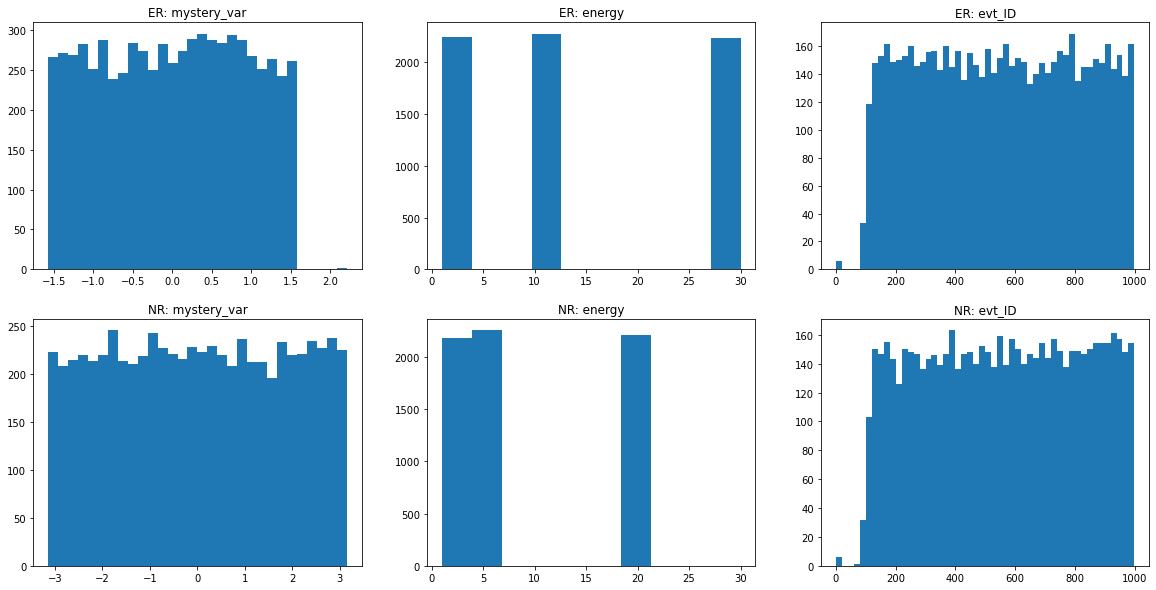

In [11]:
fig, axs = plt.subplots(len(flist), 3, figsize=(20,10))
# fig.text(0.5, 0.08, 'mystery_var', ha='left')
for i, p_type in enumerate(flist.keys()):
    axs[i, 0].hist(mystery_dict[p_type], bins=30)
    axs[i, 0].set_title(f'{p_type}: mystery_var')
    axs[i, 1].hist(energy_dict[p_type])
    axs[i, 1].set_title(f'{p_type}: energy')
    axs[i, 2].hist(event_dict[p_type], bins=50)
    axs[i, 2].set_title(f'{p_type}: evt_ID')

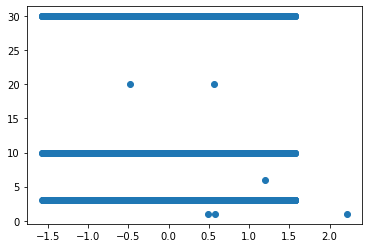

In [12]:
plt.scatter(mystery_dict['ER'], energy_dict['ER'],)

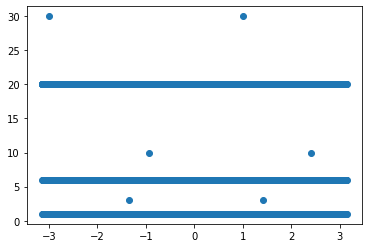

In [13]:
plt.scatter(mystery_dict['NR'], energy_dict['NR'],)

### image plotting

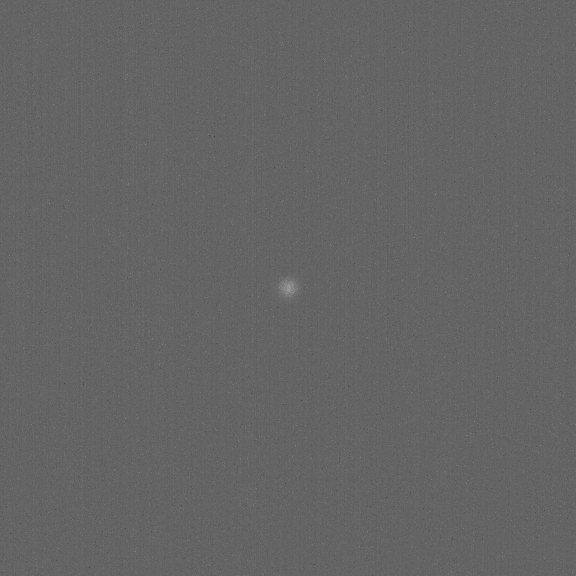

In [14]:
# im = Image.open('idao_dataset/train/ER/-0.003018522635102272__CYGNO_60_40_ER_30_keV_930V_30cm_IDAO_iso_crop_hist_pic_run1_ev121;1.png')
im = Image.open('idao_dataset/train/NR/-0.0027000000700354576__CYGNO_60_40_He_NR_20_keV_930V_30cm_SRIM_IDAO_iso_crop_hist_pic_run5_ev236;1.png')
im

In [15]:
ima = np.array(im)
ima_x = np.sum(ima, axis=0)
ima_y = np.sum(ima, axis=1)
original_x_edges = np.array(range(len(ima_x) + 1))
original_y_edges = np.array(range(len(ima_y) + 1))
ima.shape

(576, 576)

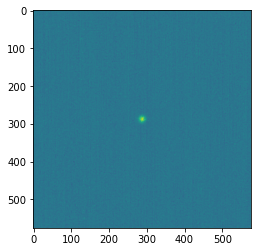

In [16]:
plt.imshow(ima)

### projections

In [17]:
ima = np.array(im)

In [18]:
step = 50
left, right = round(ima.shape[0]/2 - step), round(ima.shape[0]/2 + step)
# left, right = 0, ima.shape[0]

In [19]:
ima = ima[left:right, left:right]
ima_x = np.sum(ima, axis=0)
ima_y = np.sum(ima, axis=1)
original_x_edges = np.array(range(len(ima_x) + 1))
original_y_edges = np.array(range(len(ima_y) + 1))
ima.shape

(100, 100)

In [20]:
# ima_x_level = np.mean(ima_x[:200])
# ima_y_level = np.mean(ima_y[:200])

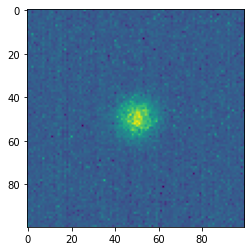

In [21]:
plt.imshow(ima)

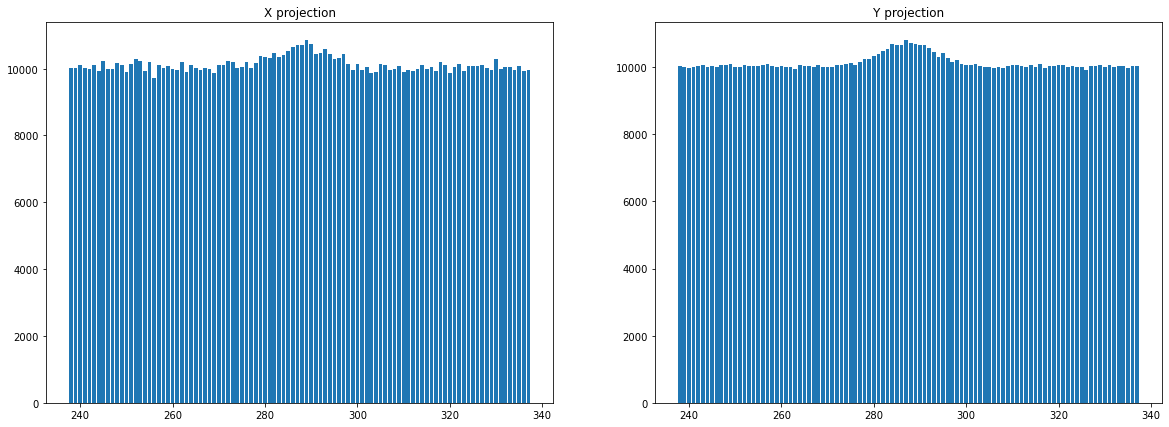

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].bar(range(left, right), ima_x)
axs[0].set_title('X projection')
axs[1].bar(range(left, right), ima_y)
axs[1].set_title('Y projection')
plt.show()

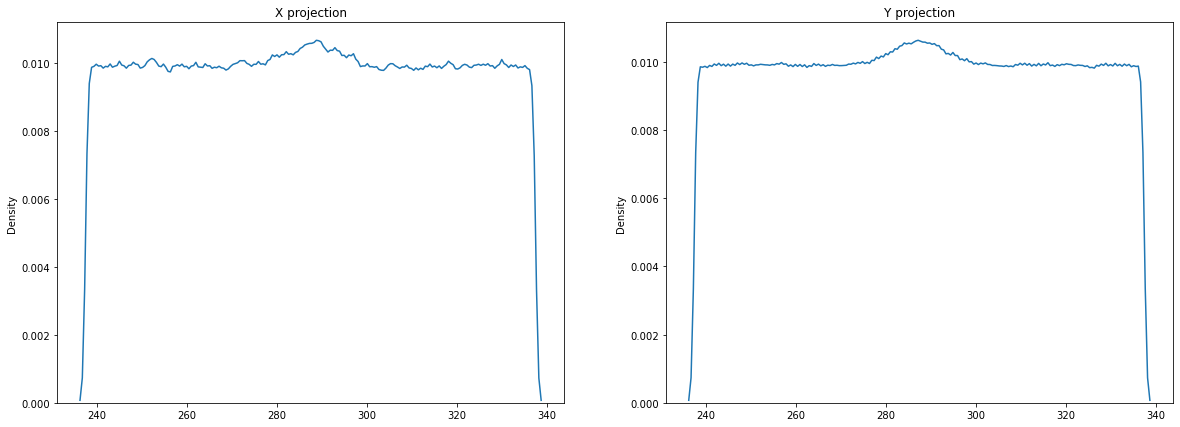

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
sns.kdeplot(x=range(left, right), weights=ima_x, bw_adjust=0.05, ax=axs[0])
axs[0].set_title('X projection')
sns.kdeplot(x=range(left, right), weights=ima_y, bw_adjust=0.05, ax=axs[1])
axs[1].set_title('Y projection')
plt.show()

### rebinning

In [44]:
nbins = 20

In [45]:
x_coord = (original_x_edges[:-1] + original_x_edges[1:])/2
x_counts, x_edges = np.histogram(x_coord, bins=nbins, weights=ima_x)

y_coord = (original_y_edges[:-1] + original_y_edges[1:])/2
y_counts, y_edges = np.histogram(y_coord, bins=nbins, weights=ima_y)

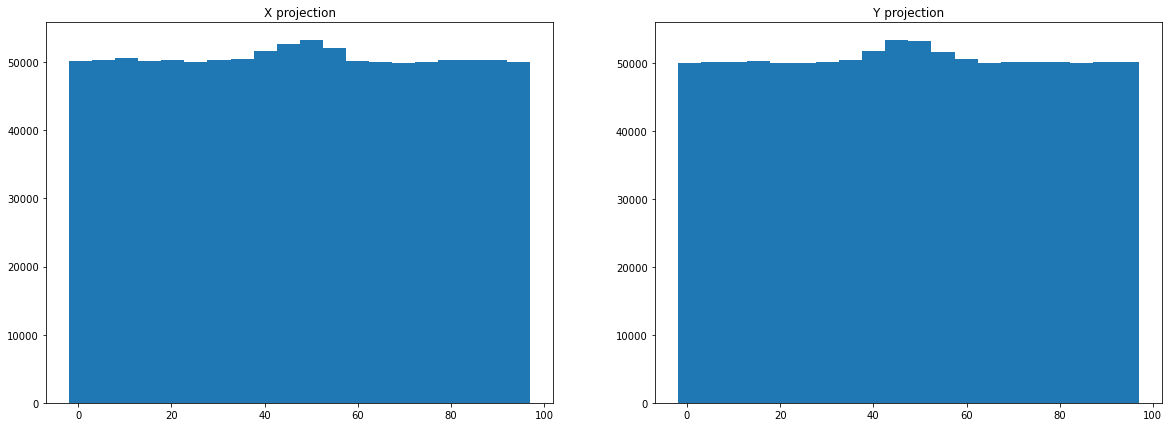

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
axs[0].bar(x_edges[:-1], x_counts, align='center', width=(x_edges[1] - x_edges[0]))
axs[0].set_title('X projection')
axs[1].bar(y_edges[:-1], y_counts, align='center', width=(y_edges[1] - y_edges[0]))
axs[1].set_title('Y projection')
plt.show()

### sampling

In [48]:
x_samples = np.random.choice(x_coord, size=ima_x.sum(), p=ima_x/ima_x.sum())